<a href="https://colab.research.google.com/github/nandhukumar86/AIML-Practice/blob/master/Basic_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import skimage.io as io

In [2]:
import skimage.io as io

In [3]:
img = io.imread('/content/drive/MyDrive/Google Photos/Painting.jpg')

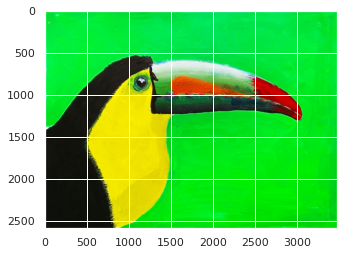

In [4]:
plt.imshow(img);

In [5]:
img.shape

(2585, 3471, 3)

In [6]:
img[0:25,0:45,2]

array([[82, 80, 78, ..., 42, 44, 44],
       [80, 79, 76, ..., 44, 44, 44],
       [79, 79, 76, ..., 44, 44, 46],
       ...,
       [68, 67, 66, ..., 47, 46, 46],
       [67, 67, 64, ..., 46, 46, 47],
       [68, 68, 67, ..., 46, 47, 47]], dtype=uint8)

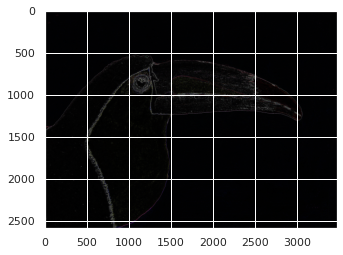

In [7]:
import cv2
import skimage.io as io


edgeDetectorKernel = np.array([[-2,0,-2],[0,8,0],[-2,0,-2]])
blurKernel = np.ones((100,100))/10000
newImg = cv2.filter2D(img, 0, edgeDetectorKernel)
plt.imshow(newImg);

In [8]:
from tensorflow.keras.datasets import mnist

In [9]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
imageId = 10;
img = X_train[imageId, :, :]
classifier = y_train[imageId]

3


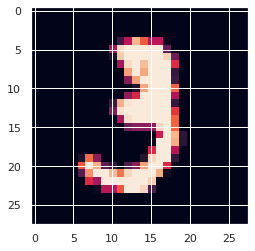

In [12]:
plt.imshow(img);
print(classifier)

In [13]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)


In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

In [16]:
np.max(X_train)

1.0

In [18]:
# from tensorflow.keras.utils import to_categorical

# y_train = to_categorical(y_train, num_classes=10)
# y_test = to_categorical(y_test, num_classes=10)

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

y_train = ohe.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = ohe.fit_transform(y_test.reshape(-1,1)).toarray()




In [19]:
y_test[0:10, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [37]:
import tensorflow as tf

tf.keras.backend.clear_session()

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D


model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))



In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# "binary_crossentropy" for binary classification.
# "sparse_categorical_crossentropy" for multi-class classification.
# "mse" for regression


In [41]:
history = model.fit(x=X_train, y=y_train, epochs=5, batch_size=32, validation_split = 0.3) 


Epoch 1/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.3241 - accuracy: 0.8978 - val_loss: 0.0646 - val_accuracy: 0.9808
Epoch 2/5
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0490 - accuracy: 0.9844 - val_loss: 0.0568 - val_accuracy: 0.9833
Epoch 3/5
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0301 - accuracy: 0.9900 - val_loss: 0.0500 - val_accuracy: 0.9853
Epoch 4/5
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0202 - accuracy: 0.9928 - val_loss: 0.0495 - val_accuracy: 0.9858
Epoch 5/5
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.0515 - val_accuracy: 0.9870


In [42]:
error = model.evaluate(X_test, y_test, verbose=0)


In [43]:
error

[0.044044315814971924, 0.9884999990463257]

In [44]:
y_test_predict = model.predict(X_test)
# y_train_predict = model.predict(X_train)


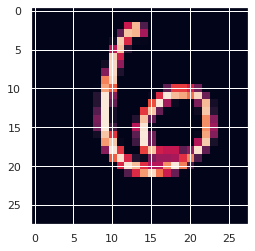

In [45]:
plt.imshow(X_test[100].reshape(28,28))

In [61]:
y_test_predict[100].argmax()

6

In [47]:
y_test[100].argmax()

6

In [48]:
history

In [51]:
history.history['accuracy']

[0.9515237808227539,
 0.9846190214157104,
 0.9889523983001709,
 0.9922857284545898,
 0.9942619204521179]

In [36]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-cc7ee656-a470-9e8e-4187-32e83903e9af)


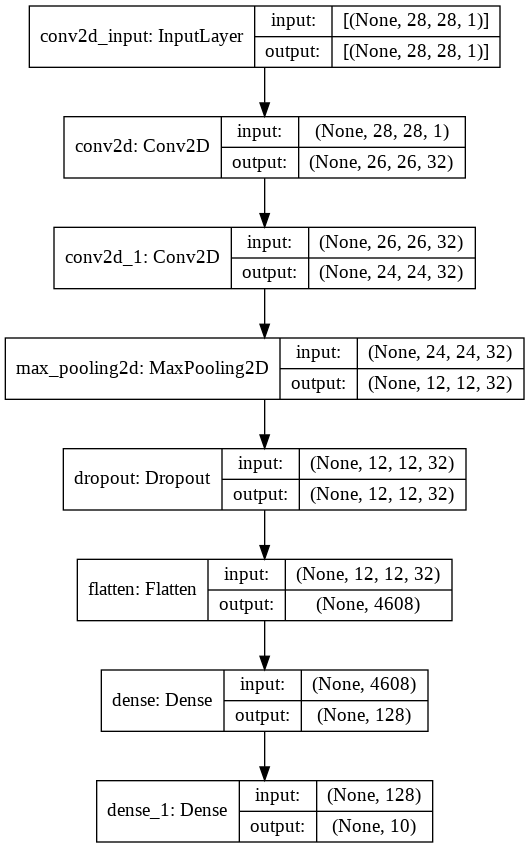

In [50]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [67]:
model.predict(X_test[145].reshape(1,28,28,1)).argmax()

1